# [Sports Connector] Homework 1 or 2


---
<img src="http://www.mercurynews.com/wp-content/uploads/2017/02/sjm-stancalbkc-0218-01.jpg?w=620" style="width: 300px; height: 450px;" />

### Professor XXX

A brief description of the notebook and how it fits into the overall module and domain.

This notebook focuses on calculating Player Efficiency Rating given Raw NBA Player Data. This is a relatively easy, albeit long, calculation so this notebook is focused on manipulating the data in order to calculate this metric for the 2016-17 NBA season. 

*Estimated Time: X minutes*

---

### Topics Covered
- Tables
- Expressions/Arrays
- Grouping
- Data Cleaning

### Table of Contents

0 - [The Data](#section data)<br>

1 - [Section 1](#section 1)<br>

2 - [Section 2](#section 2)<br>

3 - [Section 3](#section 3)<br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1 - [Subsection 1](#subsection 1)



**Dependencies:**

In [1]:
#Some Import Mumbo-Jumbo
from datascience import *
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

Ask students questions to get them thinking about the data themselves. Make sure it is clear that this text is a question they have to answer and give them a clear place to answer the question.

---

## The Data

<b>Example</b>: In this notebook, you'll be working the total stats of all players from the 2016-17 NBA season. The metrics contain each player's unique totals for statistics like Points, Assists, Rebounds, Blocks and Steals. The data itself cn be found on Basketball Reference, a popular website for basketball datasets. You'll see likely see us use data from here a couple of times in this course. You can find our dataset and more information available  <a href = https://www.basketball-reference.com/leagues/NBA_2017> here. </a>.

---

## Section 1: Understanding the Task  <a id='section 1'></a>

John Hollinger was an NBA columnist for ESPN.com for eight years and is currently the Vice President of Basketball Operations for the Memphis Grizzlies. While at ESPN, he coined many advanced metrics in order to quantify player and team performance, such as Player Efficiency Rating (PER), Offensive Efficiency, Defensive Efficiency and Pace Factor.

Today, we're going to look at Player Efficiency Rating. PER is a rating of a player’s per-minute statistical performance that Hollinger developed to make player comparisons easier, and has become a widely used standard over the past decade. Hollinger has described PER as the sum of <a href http://www.espn.com/nba/columns/story?columnist=hollinger_john&id=2850240> "all a player's positive accomplishments, subtracts the negative accomplishments, and returns a per-minute rating of a player's performance."</a>

As PER attempts to be an all-encompassing number that looks at positive accomplishments, such as like field goals, free throws, 3-pointers, assists, rebounds, blocks and steals, and negative results, such as missed shots, turnovers and fouls. 

The formula adds positive stats and subtracts negative ones through a statistical point value system. The rating for each player is then adjusted to a per-minute basis so that no player is negatively impcted by lack of playing time. It is also adjusted for pace of play. In the end, PER serves as one number that attempts to create an overall player score.


---

<b>Question 1:</b> Since PER attempts to be an all-encompassing number, it attempts to create an overall score. Choose your favorite sport, other than basketball. What do you think should go into an overall score rating for players in that sport? 

<b>Answer:</b>

---


$$\ PER = \left ( uPER \times \frac{lgPace}{tmPace} \right ) \times \frac{15}{lguPER} $$

Where:
* ''uPER'' stands for unadjusted PER
* ''tm'', the prefix, indicating of team rather than of player;
* ''lg'', the prefix, indicating of league rather than of player;
* ''Pace'' is related to the style of play of a team. We'll also get there later.

$$uPER = \frac{1}{min} \times \left ( 3P - \frac{PF \times lgFT}{lgPF} + \left [ \frac{FT}{2} \times \left ( 2 - \frac{tmAST}{3 \times tmFG} \right ) \right ] + \left [ FG \times \left ( 2 - \frac{factor \times tmAST}{tmFG} \right ) \right ] + \frac{2 \times AST}{3} + VOP \times \left [ DRBP \times \left ( 2 \times ORB + BLK - 0.2464 \times \left [ FTA - FT \right ] - \left [ FGA - FG \right ] - TRB \right ) + \frac{0.44 \times lgFTA \times PF}{lgPF} - \left ( TO + ORB \right ) + STL + TRB - 0.1936 \left (FTA - FT \right ) \right ] \right )$$

---

<b>Question 2:</b> Does anything interesting stand out to you initially about that formula?
    
<b>Answer:</b>

---


Ok! Now, let's look at the data we have available. 

Here are the columns in the table below. It's pretty standard if you follow basketball.
* Rk -- Rank
* Pos -- Position
* Age -- Age of Player at the start of February 1st of that season.
* Tm -- Team
* G -- Games
* GS -- Games Started
* MP -- Minutes Played
* FG -- Field Goals
* FGA -- Field Goal Attempts
* FG% -- Field Goal Percentage
* 3P -- 3-Point Field Goals
* 3PA -- 3-Point Field Goal Attempts
* 3P% -- 3-Point Field Goal Percentage
* 2P -- 2-Point Field Goals
* 2PA -- 2-point Field Goal Attempts
* 2P% -- 2-Point Field Goal Percentage
* eFG% -- Effective Field Goal Percentage (<a href https://www.sportingcharts.com/dictionary/nba/effective-field-goal-percentage-efg.aspx> More Info </a> )
* FT -- Free Throws
* FTA -- Free Throw Attempts
* FT% -- Free Throw Percentage
* ORB -- Offensive Rebounds
* DRB -- Defensive Rebounds
* TRB -- Total Rebounds
* AST -- Assists
* STL -- Steals
* BLK -- Blocks
* TOV -- Turnovers
* PF -- Personal Fouls
* PTS -- Points


You'll notice that our data has some players appearing more than once. That is because that player was traded or moved teams in the middle of the season. 

*For example:* Quincy Acy played 38 games total (TOT). Of those, 32 games were played for the Brooklyn Nets (BRK) and 6 were played for the Dallas Mavericks (DAL)

In [4]:
# CODE
player_stats = Table().read_table('NBAPlayerStats2017c.csv')
player_stats.take(np.arange(5))

Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Alex Abrines,SG,23,OKC,68,6,1055,134,341,0.393,94,247,0.381,40,94,0.426,0.531,44,49,0.898,18,68,86,40,37,8,33,114,406
2,Quincy Acy,PF,26,TOT,38,1,558,70,170,0.412,37,90,0.411,33,80,0.413,0.521,45,60,0.75,20,95,115,18,14,15,21,67,222
2,Quincy Acy,PF,26,DAL,6,0,48,5,17,0.294,1,7,0.143,4,10,0.4,0.324,2,3,0.667,2,6,8,0,0,0,2,9,13
2,Quincy Acy,PF,26,BRK,32,1,510,65,153,0.425,36,83,0.434,29,70,0.414,0.542,43,57,0.754,18,89,107,18,14,15,19,58,209
3,Steven Adams,C,23,OKC,80,80,2389,374,655,0.571,0,1,0,374,654,0.572,0.571,157,257,0.611,281,332,613,86,89,78,146,195,905


Now for some coding:

---
<b>Question 3:</b> How many minutes were played in the 2016-17 season? **Hint: Don't forget about duplicates**

<b>Answer:</b>

---

In [7]:
#CODE Answer
sum(player_stats.where('Tm', are.not_equal_to('TOT')).column('MP'))

594404

Let's remove those pesky duplicates.

---
<b>Question 3.5:</b> Remove all instances of Team Name 'TOT' from player_stats.

<b>Answer:</b>

---

In [51]:
#Code Answer
player_stats = player_stats.where('Tm', are.not_equal_to('TOT'))



---
<b>Question 4:</b> Sort the table by a few stats that you think might be relevant. Show one sorted example in the block below. Based on your sorting, who do you think will have the highest PER in the data and why?

<b>Answer:</b>

---

In [9]:
#Code Answer
player_stats.where('Tm', are.not_equal_to('TOT')).sort('PTS', descending=True).take(np.arange(5))

Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
458,Russell Westbrook,PG,28,OKC,81,81,2802,824,1941,0.425,200,583,0.343,624,1358,0.459,0.476,710,840,0.845,137,727,864,840,132,31,438,190,2558
172,James Harden,PG,27,HOU,81,81,2947,674,1533,0.44,262,756,0.347,412,777,0.53,0.525,746,881,0.847,95,564,659,907,121,38,464,215,2356
424,Isaiah Thomas,PG,27,BOS,76,76,2569,682,1473,0.463,245,646,0.379,437,827,0.528,0.546,590,649,0.909,43,162,205,448,70,13,210,167,2199
100,Anthony Davis,C,23,NOP,75,75,2708,770,1526,0.505,40,134,0.299,730,1392,0.524,0.518,519,647,0.802,172,712,884,157,94,167,181,168,2099
433,Karl-Anthony Towns,C,21,MIN,82,82,3030,802,1480,0.542,101,275,0.367,701,1205,0.582,0.576,356,428,0.832,296,711,1007,220,56,103,212,241,2061


## Section 2: Calculating uPER. <a id='section 2'></a>

This is uPER. It's the unadjusted form of PER. 

$$uPER = \frac{1}{min} \times \left ( 3P - \frac{PF \times lgFT}{lgPF} + \left [ \frac{FT}{2} \times \left ( 2 - \frac{tmAST}{3 \times tmFG} \right ) \right ] + \left [ FG \times \left ( 2 - \frac{factor \times tmAST}{tmFG} \right ) \right ] + \frac{2 \times AST}{3} + VOP \times \left [ DRBP \times \left ( 2 \times ORB + BLK - 0.2464 \times \left [ FTA - FT \right ] - \left [ FGA - FG \right ] - TRB \right ) + \frac{0.44 \times lgFTA \times PF}{lgPF} - \left ( TO + ORB \right ) + STL + TRB - 0.1936 \left (FTA - FT \right ) \right ] \right )$$

It's a massive formula. So let's break it down into pieces and calculate it for one player. 

In [13]:
# CODE

"""I'm randomly picking a player."""

import random
names = player_stats.where('Tm', are.not_equal_to('TOT')).column('Player')
print(random.choice(names))

Sean Kilpatrick


My randomly selected player was Sean Kilpatrick, of the Brooklyn Nets. Let's look at his statline.

In [15]:
kilpatrick = player_stats.where('Player', are.equal_to('Sean Kilpatrick'))
kilpatrick

Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
246,Sean Kilpatrick,SG,27,BRK,70,24,1754,305,735,0.415,105,308,0.341,200,427,0.468,0.486,204,242,0.843,22,258,280,157,45,6,135,118,919


Let's start with an easy part of the formula:

$$ \frac{2 \times AST}{3} $$

---
<b>Question 5:</b> Write a function called **assists** that takes in a number of assists and returns 2/3 of that number. Then test it on Sean Kilpatrick (or your player)

<b>Answer:</b>

---

In [36]:
#Code Answer
def assists(number_of_assists):
    return ((2/3)*number_of_assists)

kilpatrick_asts = kilpatrick.column('AST')[0]

assists(kilpatrick_asts)

104.66666666666666

Great job! That wasn't too bad, right? Now let's calculate a slightly harder piece.

$ (2 \times ORB + BLK - 0.2464 \times \left [ FTA - FT \right ] - \left [ FGA - FG \right ] - TRB) $

<b>Question 6:</b> Write a function called **times_DRBP** that takes a player's name as a string, and uses *player_stats* to return the value for the above formula. Then test it on Sean Kilpatrick (or your player)

<b>Answer:</b>

In [43]:
def times_DRBP(name):
    player = player_stats.where('Player', are.equal_to(name))
    orb = player.column('ORB')[0]
    blk = player.column('BLK')[0]
    fta = player.column('FTA')[0] 
    ft = player.column('FT')[0]
    fga = player.column('FGA')[0]
    fg = player.column('FG')[0]
    trb = player.column('TRB')[0]
    return (2*orb+blk-0.2464*(fta-ft)-(fga-fg)-trb)

times_DRBP('Sean Kilpatrick')

-669.36320000000001

Now you may be wondering why we called that last function *times_DRBP.* Well, it is because we're going to multiply it by our DRBP. 

DRBP, stands for Defensive Rebound Percentage, and is simply calculated by taking all the rebounds in the league and removing the rebounds that occured while on offense. Mathematically,

$$ DRBP = \frac {League Total Rebounds - League Offensive Rebounds}{League Total Rebounds} $$

*Note: Yes, You can just use the DRB column.*

---

<b>Question 7:</b> Calculate the league's defensive rebound percentage. Set it equal to **drbp**.  *Don't forget to remove duplicates!*

<b>Answer:</b>

---

In [49]:
lg_trb = sum(player_stats.where('Tm', are.not_equal_to('TOT')).column('TRB'))
lg_orb = sum(player_stats.where('Tm', are.not_equal_to('TOT')).column('ORB'))
drbp = (lg_trb-lg_orb)/lg_trb
drbp


0.76704407451002377

Now we're getting closer to the full calculation. Look at this formula. You've already calculated most of it. 

$$\left [ DRBP \times \left ( 2 \times ORB + BLK - 0.2464 \times \left [ FTA - FT \right ] - \left [ FGA - FG \right ] - TRB \right ) + \frac{0.44 \times lgFTA \times PF}{lgPF} - \left ( TOV + ORB \right ) + STL + TRB - 0.1936 \left (FTA - FT \right ) \right ] )$$

---

<b>Question 8:</b> Using Questions 6 & 7, build a function called *second_half,* that calculates the second half of the PER formula for a given player. 

<b>Answer:</b>

---

In [52]:
def second_half(name):
    player = player_stats.where('Player', are.equal_to(name))
    
    constant = drbp * times_DRBP(name)
    
    lg_fta = sum(player_stats.column('FTA'))
    lg_pf = sum(player_stats.column('PF'))
    pf = player.column('PF')[0]
    fraction = (0.44*lg_fta*pf)/lg_pf
    
    tov = player.column('TOV')[0]
    orb = player.column('ORB')[0]
    stl = player.column('STL')[0]
    trb = player.column('TRB')[0]
    fta = player.column('FTA')[0] 
    ft = player.column('FT')[0]
    
    result = constant + fraction - (tov + orb) + stl + trb - (.1936*(fta-ft))
    return (result)

second_half('Sean Kilpatrick')

-292.48324704158483

Our function is starting to look more manageable!

$$uPER = \frac{1}{min} \times  ( 3P - \frac{PF \times lgFT}{lgPF} + \left [ \frac{FT}{2} \times \left ( 2 - \frac{tmAST}{3 \times tmFG} \right ) \right ] + \left [ FG \times \left ( 2 - \frac{factor \times tmAST}{tmFG} \right ) \right ] + \frac{2 \times AST}{3} + VOP \times SecondHalf$$

Now, let's calculate VOP, before we take the big push towards calculating uPER. 

VOP, or value of possession, is what each possesion is worth in a given season. We can calculate VOP by:

$$ VOP = \frac{lgPTS}{lgFGA - lgORB + lgTOV + 0.44 \times lgFTA} $$

---

<b>Question 9:</b> Compute Value Of Possession for the League in 2016-17. Save your value as *"vop."* 

<b>Answer:</b>

---

In [53]:
#Code Answer
lgPTS = sum(player_stats.column('PTS'))
lgFGA = sum(player_stats.column('FGA'))
lgORB = sum(player_stats.column('ORB'))
lgTOV = sum(player_stats.column('TOV'))
lgFTA = sum(player_stats.column('FTA'))

vop = lgPTS/(lgFGA-lgORB+lgTOV+(.44*lgFTA))
vop

1.0685413540268014

Ready? Now for the Big Kahuna. Calculate uPER. 

There are two new things that you'll have to know.

* 1) You have to know is that for tmAST and tmFG, you're looking at the team's assists for 2016-17, rather than the player's or the league's.

* 2) You also need to calculate the factor that you'll need for the next part.

$$ factor = \frac{2}{3} - \left [ \left ( 0.5 \times \frac{lgAST}{lgFG} \right ) \div \left ( 2 \times \frac{lgFG}{lgFT} \right ) \right ] $$

* Formula for uPER:

$$uPER = \frac{1}{min} \times  ( 3P - \frac{PF \times lgFT}{lgPF} + \left [ \frac{FT}{2} \times \left ( 2 - \frac{tmAST}{3 \times tmFG} \right ) \right ] + \left [ FG \times \left ( 2 - \frac{factor \times tmAST}{tmFG} \right ) \right ] + \frac{2 \times AST}{3} + VOP \times SecondHalf)$$

---

<b>Question 11:</b> Using All of the questions from Section 2, compute the unadjusted Player Efficiency Rating. Write your answer as a generalized function called *uPER* that takes in a player's name and outputs their uPER. Run your function for Sean Kilpatrick. 

<b>Answer:</b>

---


In [59]:
# Code Answer

def uPER(name):
    player = player_stats.where('Player', are.equal_to(name))
    
    secondhalf = second_half(name)
    v0p = vop
    adjAST = assists(player.column('AST')[0])
    
    invMin = 1/(player.column('MP')[0])
    
    tP = player.column('3P')[0]
    
    lgFT = sum(player_stats.column('FT'))
    lgPF = sum(player_stats.column('PF'))
    PF = player.column('PF')[0]
    PF_FT = (lgFT*PF)/lgPF
    
    FT_2 = (player.column('FT')[0])/2 
    
    team = player_stats.where('Tm', are.equal_to(player.column('Tm')[0]))
    tmAST = sum(team.column('AST'))
    tmFG = (sum(team.column('FG')))
    
    FT_AST_FG = (FT_2*(2-(tmAST/(3*tmFG))))
    
    lgAST = sum(player_stats.column('AST'))
    lgFG = sum(player_stats.column('FG'))
    
    FG = player.column('FG')[0]
    factor = (2 / 3) - (0.5 * (lgAST / lgFG)) / (2 * (lgFG / lgFT))
    
    FG_factor = FG * (2 - ((factor*tmAST)/(tmFG)))
    
    result = invMin * (tP - (PF_FT) + (FT_AST_FG) + (FG_factor) + adjAST + v0p * secondhalf)
    
    return (result)

uPER('Sean Kilpatrick')

0.2750427505907358

## Section 3; Onward to PER. <a id='section 3'></a>

Now that we've done the hard part. Let's finish up our calculation and look at the fruits of our labor.

$$\ PER = \left ( uPER \times \frac{lgPace}{tmPace} \right ) \times \frac{15}{lguPER} $$

---

<b>Question 11:</b> Now that we have a formula for uPER, add a column to *player_stats* called uPER, with the uPER of every player.

<b>Answer:</b>

---


In [63]:
# CODE
players = player_stats.column('Player')

array = make_array()
for each in players:
    array = np.append(array, uPER(each))
    
player_stats = player_stats.with_column('uPER', array)
player_stats.take(np.arange(12,15))

Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,uPER
12,Alan Anderson,SF,34,LAC,30,0,308,30,80,0.375,14,44,0.318,16,36,0.444,0.463,12,16,0.75,3,21,24,11,3,0,7,35,86,0.0988842
13,Justin Anderson,SF,23,DAL,51,2,710,111,277,0.401,37,122,0.303,74,155,0.477,0.468,70,88,0.795,39,110,149,32,28,16,40,64,329,0.280476
13,Justin Anderson,SF,23,PHI,24,8,518,75,162,0.463,21,72,0.292,54,90,0.6,0.528,32,41,0.78,30,66,96,34,13,7,26,45,203,0.280476


Our last tedious step before we can calculate PER is find the <a href https://www.basketball-reference.com/about/glossary.html#pace> Pace, which is derived by a slightly annoying formula. </a>

The Pace Factor formula is: $$48 * \frac{Tm Poss + Opp Poss}{2 * Tm MP / 5}.$$ 

The Team + Opposition Possessions is estimated as: $$0.5 * ((Tm FGA + 0.4 * Tm FTA - 1.07 * \frac{Tm ORB}{Tm ORB + Opp DRB} * (Tm FGA - Tm FG) + Tm TOV) + (Opp FGA + 0.4 * Opp FTA - 1.07 * \frac{Opp ORB}{Opp ORB + Tm DRB} * (Opp FGA - Opp FG) + Opp TOV))$$


---

<b>Question 13:</b> Calculate the Pace Factor for each team. $$ \frac{lgPace}{tmPace} $$ 

Note: League Pace is the sum of all Pace. Add a column to *player_stats.*

<b>Answer:</b>

---



In [73]:
pace = Table().read_table('Pace.csv')
player_stats = player_stats.join('Tm', pace, 'Team')
player_stats = player_stats.with_column('Pace Factor', 96.4/player_stats.column('Pace'))
player_stats

Tm,Rk,Player,Pos,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,uPER,Pace,Pace_2,Pace Factor
ATL,35,Kent Bazemore,SF,27,73,64,1963,295,721,0.409,92,266,0.346,203,455,0.446,0.473,119,168,0.708,45,186,231,177,91,52,125,165,801,0.233943,97.4,97.4,0.989733
ATL,40,DeAndre' Bembry,SF,22,38,1,371,47,98,0.48,1,18,0.056,46,80,0.575,0.485,6,16,0.375,14,45,59,28,8,5,16,21,101,0.179274,97.4,97.4,0.989733
ATL,68,Jose Calderon,PG,35,17,2,247,23,57,0.404,8,30,0.267,15,27,0.556,0.474,7,8,0.875,7,25,32,37,4,0,15,14,61,0.186176,97.4,97.4,0.989733
ATL,105,Malcolm Delaney,PG,27,73,2,1248,145,388,0.374,26,110,0.236,119,278,0.428,0.407,75,93,0.806,10,113,123,193,39,1,95,112,391,0.151772,97.4,97.4,0.989733
ATL,117,Mike Dunleavy,SF,36,30,0,475,57,130,0.438,33,77,0.429,24,53,0.453,0.565,22,26,0.846,13,55,68,30,9,5,14,35,169,0.152657,97.4,97.4,0.989733
ATL,171,Tim Hardaway,SG,24,79,30,2154,415,912,0.455,149,417,0.357,266,495,0.537,0.537,164,214,0.766,35,189,224,182,55,15,106,103,1143,0.307509,97.4,97.4,0.989733
ATL,205,Dwight Howard,C,31,74,74,2199,388,613,0.633,0,2,0,388,611,0.635,0.633,226,424,0.533,296,644,940,104,64,92,170,203,1002,0.423799,97.4,97.4,0.989733
ATL,208,Kris Humphries,PF,31,56,4,689,87,214,0.407,19,54,0.352,68,160,0.425,0.451,64,82,0.78,60,146,206,29,15,21,28,69,257,0.276498,97.4,97.4,0.989733
ATL,212,Ersan Ilyasova,PF,29,26,12,633,93,226,0.412,32,92,0.348,61,134,0.455,0.482,52,65,0.8,42,109,151,43,22,8,34,73,270,0.13997,97.4,97.4,0.989733
ATL,244,Ryan Kelly,PF,25,16,0,110,8,28,0.286,4,10,0.4,4,18,0.222,0.357,5,6,0.833,1,17,18,8,4,5,4,5,25,0.158466,97.4,97.4,0.989733


$$\ PER = \left ( uPER \times \frac{lgPace}{tmPace} \right ) \times \frac{15}{lguPER} $$

In [75]:
# CODE
player_stats = player_stats.with_column('PER',\
    (player_stats.column('uPER')*\
    player_stats.column('Pace Factor'))*\
    (15/(sum(player_stats.column('uPER'))\
        /player_stats.num_rows)))
player_stats

Tm,Rk,Player,Pos,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,uPER,Pace,Pace_2,Pace Factor,PER
ATL,35,Kent Bazemore,SF,27,73,64,1963,295,721,0.409,92,266,0.346,203,455,0.446,0.473,119,168,0.708,45,186,231,177,91,52,125,165,801,0.233943,97.4,97.4,0.989733,13.5972
ATL,40,DeAndre' Bembry,SF,22,38,1,371,47,98,0.48,1,18,0.056,46,80,0.575,0.485,6,16,0.375,14,45,59,28,8,5,16,21,101,0.179274,97.4,97.4,0.989733,10.4198
ATL,68,Jose Calderon,PG,35,17,2,247,23,57,0.404,8,30,0.267,15,27,0.556,0.474,7,8,0.875,7,25,32,37,4,0,15,14,61,0.186176,97.4,97.4,0.989733,10.8209
ATL,105,Malcolm Delaney,PG,27,73,2,1248,145,388,0.374,26,110,0.236,119,278,0.428,0.407,75,93,0.806,10,113,123,193,39,1,95,112,391,0.151772,97.4,97.4,0.989733,8.82129
ATL,117,Mike Dunleavy,SF,36,30,0,475,57,130,0.438,33,77,0.429,24,53,0.453,0.565,22,26,0.846,13,55,68,30,9,5,14,35,169,0.152657,97.4,97.4,0.989733,8.87274
ATL,171,Tim Hardaway,SG,24,79,30,2154,415,912,0.455,149,417,0.357,266,495,0.537,0.537,164,214,0.766,35,189,224,182,55,15,106,103,1143,0.307509,97.4,97.4,0.989733,17.873
ATL,205,Dwight Howard,C,31,74,74,2199,388,613,0.633,0,2,0,388,611,0.635,0.633,226,424,0.533,296,644,940,104,64,92,170,203,1002,0.423799,97.4,97.4,0.989733,24.632
ATL,208,Kris Humphries,PF,31,56,4,689,87,214,0.407,19,54,0.352,68,160,0.425,0.451,64,82,0.78,60,146,206,29,15,21,28,69,257,0.276498,97.4,97.4,0.989733,16.0706
ATL,212,Ersan Ilyasova,PF,29,26,12,633,93,226,0.412,32,92,0.348,61,134,0.455,0.482,52,65,0.8,42,109,151,43,22,8,34,73,270,0.13997,97.4,97.4,0.989733,8.13533
ATL,244,Ryan Kelly,PF,25,16,0,110,8,28,0.286,4,10,0.4,4,18,0.222,0.357,5,6,0.833,1,17,18,8,4,5,4,5,25,0.158466,97.4,97.4,0.989733,9.21036


The lgPER refers to average I think. Figre out that.

Have people look at PER for each person. Examination of top 5 or something.

---

## Bibliography

https://www.basketball-reference.com/about/per.html

---

#### Notes for Notebook Style:

- Follow [PEP 8](https://www.python.org/dev/peps/pep-0008/) style guide for Python
- No two cells of successive code or Markdown
- Run all cells with no errors
- Clear all cell output before pushing
- Create a binder for the repo on [mybinder.org](http://mybinder.org) and paste the badge to the top of the README markdown file


#### Notes for Code Style:
- Each line or section of code should be accompanied with a comment
- Comments and code lines should not be too long
- Naming variables: use descriptive names (titanic vs. data), use underscores, not camel case

#### Notes for Visualizations
- Graphs should be displayed with titles and label axes

#### Example of good code and graphs

First, we will learn about basic plotting with pandas and seaborn.

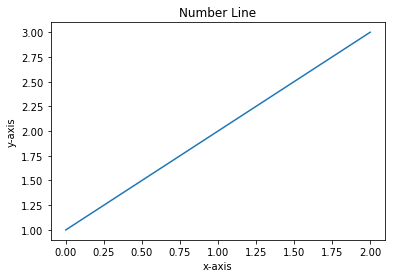

In [6]:
# Import pandas, a data science library, and matplotlib for plotting
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame, or a container of data, with numbers 1 - 3
numbers = pd.DataFrame([1, 2, 3])

# Plots the numbers DataFrame
plt.plot(numbers)
plt.title("Number Line") 
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.show()

---
Notebook developed by: X, X, X

Data Science Modules: http://data.berkeley.edu/education/modules
